In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cars-pivot.csv", index_col=["STM", "Month", "Day"])
df.head()

0         1         2         3         4         5  \
STM Month Day                                                                   
2   1     Weekend  5.516129  4.258065  2.935484  2.580645  1.516129  5.064516   
          Workday  2.112903  1.096774  0.725806  0.532258  0.532258  7.370968   
    2     Weekend  5.807692  4.346154  3.500000  2.923077  2.076923  4.923077   
          Workday  2.372881  1.627119  0.728814  0.661017  0.661017  7.322034   
    3     Weekend  7.307692  4.689655  3.217391  2.807692  1.692308  6.038462   

                           6          7          8          9  ...         15  \
STM Month Day                                                  ...              
2   1     Weekend   6.354839  14.483871  22.354839  31.709677  ...  46.548387   
          Workday  11.580645  18.129032  27.903226  25.209677  ...  73.000000   
    2     Weekend   5.961538  14.076923  27.923077  39.153846  ...  45.615385   
          Workday  11.542373  19.322034  29.694915  26.932203  ...  69.677966   
    3     Weekend   7.846154  19.923077  40.269231  62.461538  ...  55.423077   

                          16         17         18         19         20  \
STM Month Day                                                              
2   1     Weekend  41.870968  45.064516  40.096774  38.258065  27.000000   
          Workday  61.790323  68.725806  54.209677  41.451613  27.741935   
    2     Weekend  38.846154  41.615385  39.884615  33.000000  22.115385   
          Workday  62.186441  68.033898  55.135593  41.338983  29.576271   
    3     Weekend  45.384615  43.461538  40.423077  40.192308  28.500000   

                          21         22        23   SUMA  
STM Month Day                                             
2   1     Weekend  16.290323  12.225806  5.677419  SUMA1  
          Workday  16.693548  15.225806  5.919355  SUMA1  
    2     Weekend  15.846154  11.461538  6.269231  SUMA1  
          Workday  17.610169  14.830508  6.101695  SUMA1  
    3     Weekend  18.576923  11.538462  7.307692  SUMA1  

[5 rows x 25 columns]

In [3]:
df['SUM'] = df.sum(axis=1, numeric_only=True)

Top 10 most frequented counters.

In [4]:
df.sort_values(by='SUM', ascending=False).head(10)[['SUM', 'SUMA']]

SUM   SUMA
STM Month Day                         
897 8     Weekend  36197.321429  SUMA2
854 8     Weekend  35950.666667  SUMA1
855 8     Workday  35198.258065  SUMA1
    7     Workday  35120.676923  SUMA1
    6     Workday  35034.800000  SUMA1
    5     Workday  35002.193548  SUMA1
179 10    Workday  34876.603175  SUMA2
    11    Workday  34716.888889  SUMA2
855 9     Workday  34709.672131  SUMA1
178 8     Weekend  34709.285714  SUMA1

<AxesSubplot: >

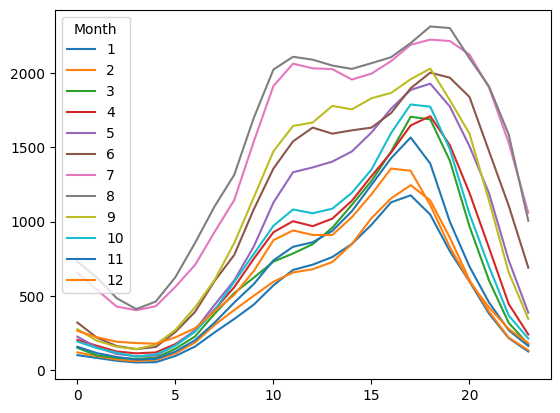

In [5]:
counter897 = df[(df.index.get_level_values(0) == 897) & (df['SUMA'] == 'SUMA2') & (df.index.get_level_values(2) == 'Weekend')]
counter897.reset_index().drop(['SUMA', 'SUM', 'STM', 'Day'], axis=1).set_index('Month').T.plot.line()

# Rush hour

<AxesSubplot: title={'center': 'Afternoon rush hour'}>

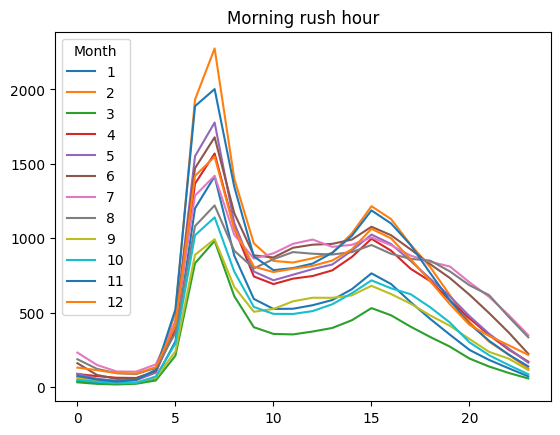

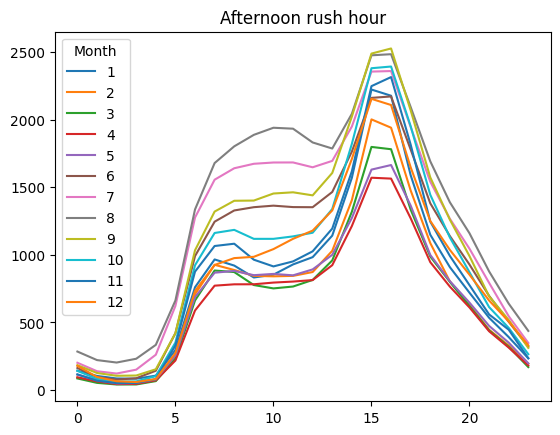

In [6]:
counter854_2 = df[(df.index.get_level_values(0) == 854) & (df['SUMA'] == 'SUMA2') & (df.index.get_level_values(2) == 'Workday')]
counter854_2.reset_index().drop(['SUMA', 'SUM', 'STM', 'Day'], axis=1).set_index('Month').T.plot(title='Morning rush hour')
counter854_1 = df[(df.index.get_level_values(0) == 854) & (df['SUMA'] == 'SUMA1') & (df.index.get_level_values(2) == 'Workday')]
counter854_1.reset_index().drop(['SUMA', 'SUM', 'STM', 'Day'], axis=1).set_index('Month').T.plot(title='Afternoon rush hour')


# Workday vs. weekend

<AxesSubplot: title={'center': 'Weekend averages'}>

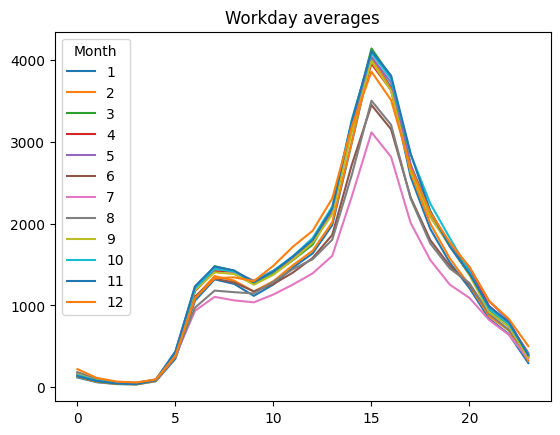

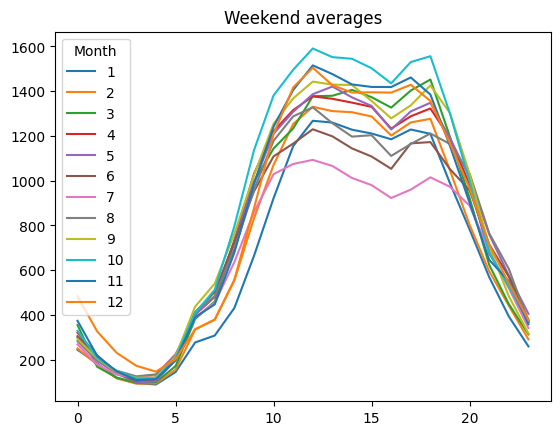

In [7]:
counter179 = df[(df.index.get_level_values(0) == 179) & (df['SUMA'] == 'SUMA2') & (df.index.get_level_values(2) == 'Workday')]
counter179.reset_index().drop(['SUMA', 'SUM', 'STM', 'Day'], axis=1).set_index('Month').T.plot(title='Workday averages')
counter179w = df[(df.index.get_level_values(0) == 179) & (df['SUMA'] == 'SUMA2') & (df.index.get_level_values(2) == 'Weekend')]
counter179w.reset_index().drop(['SUMA', 'SUM', 'STM', 'Day'], axis=1).set_index('Month').T.plot(title='Weekend averages')